<a href="https://colab.research.google.com/github/Arpitpandey99/PyTorch/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with Pytorch

https://www.learnpytorch.io/02_pytorch_classification/

https://github.com/mrdbourke/pytorch-deep-learning/blob/main/video_notebooks/02_pytorch_classification_video.ipynb

Learning Sheet: https://docs.google.com/spreadsheets/d/1hYa3OqijDZizR7oD4u5XmmEcsARSmdZNdWVrmFa28so/edit#gid=0


## 1. Make classification data and get it ready

In [ ]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"Print 5 samples of X: ")
print(X[:5])

print(f"Print 5 samples of X: ")
print(y[:5])

Print 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Print 5 samples of X: 
[1 1 1 1 0]


In [ ]:
# Make Dataframe of circle data
import pandas as pd

circles = pd.DataFrame({"X1":X[:,0],
                        "X2":X[:,1],
                        "label":y})

circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


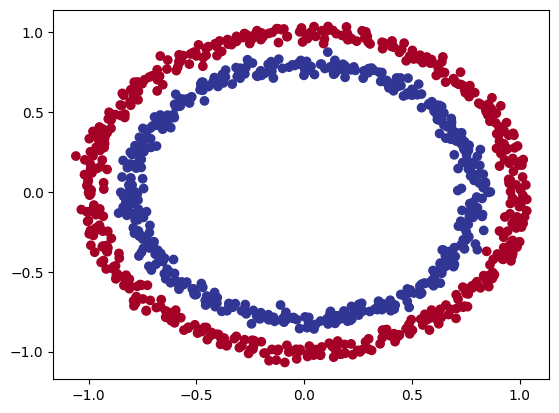

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset, a dataset that is small enough to experiment but still sizable enough to practice the fundamentals.

In this problem we have to identify that whether the coordinates belong to red class or a blue class i.e either 0 or 1

### 1.1 Check input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
X_sample = X[0]
y_sample = y[0]

print(f"Value for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Value for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shape for one sample of X: (2,) and the same for y: ()


### 1.2 Turn data into tensors and create train and test split

In [ ]:
import torch
torch.__version__

'2.2.1+cu121'

In [ ]:
type(X)

numpy.ndarray

In [ ]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [ ]:
type(X),X.dtype,y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [ ]:
torch.manual_seed(42)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)



In [ ]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

## 2. Building the Model

Classify the red dot and blue dot

To do so we want to:
1. Setup device agnostic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing `nn.module`)
3. Define a loss function and optimizer
4. Creting training and testing loop

In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

### Lets create a model that:

1. Subclass `nn.Module` (almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layer that are capable of handling the shape of our data
3. Define a `forward()` mothod that outlines the forward pass (or forward computation) of the model
4. Instantiate an instance of our model class and send it to the target device

In [ ]:
# 1. Construct a model that subclass nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()

    # 2. Create a linear layer capable of handling the sahpes of out data
    self.layer_1 = nn.Linear(in_features= 2, out_features=5) # takes 2 features and upscale to 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from the previous layer and outputs a single feature (same shape as y)

  # 3. define forward method
  def forward(self,x):
    return self.layer_2(self.layer_1(x))  # x -> layer_! -> layer_2

#4. Instantiate an instance of our model class and send it to targer device
model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# Lets replicate the model above using nn.Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Making predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of prediction: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of prediction: {len(X_test)}, Shape: {X_test.shape}")
print(f"First 10 predictions: {torch.round(untrained_preds[:10])}")
print(f"First 10 labels: {y_test[:10]}")

Length of prediction: 200, Shape: torch.Size([200, 1])
Length of prediction: 200, Shape: torch.Size([200, 2])
First 10 predictions: tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')
First 10 labels: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


## 2.1 Setup loss function and optimizer

Which loss function or optimizer should we use

For Ex for regression we use MAE or MSE

For classification we want binary cross entropy or categorical cross entropy

Reminder: Loss function is how much incorrect our predictions are

And for the optimizers, two of them are most common and useful are SGD and Adam, However PyTorch has many Build in options

* For the loss function we're going to use `torch.nn.BCEWithLogitsLoss() https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a
* For a definition on what a logit is in Deep Learning - https://stackoverflow.com/a/52111173
* For diffent optiizers see `torch.optim`
`

In [ ]:
# Setup loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCE activation function
loss_fn = nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss = sigmoid activation function buildin

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [ ]:
# Calculate accuracy - out of 100 example what percentage does our model get right?

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred))*100
  return acc

## 3. Train model

To Train our model, we're going to need to build a training loop:

1. Forward pass
2. Calculate loss
3. optimizer zero grad
4. Loss Backward (Backpropogation)
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our Model outputs are going to be a raw **logits**

We can convert these **logits** into prediction probabilities by passing them to some king of activation function (e.g. sigmoid for binary classification and softmax for multiclass classification).

Then we can convert out model prediction probabilities to **prediction labels by either rouding them or taking the `argmax()`

In [ ]:
## View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our prediction probability values, we need to perform a range style rounding on them

* `y_pred_probs` >= 0.5  `y=1` (class 1)
* `y_pred_probs` < 0.5   `y=0` (class 0)

In [ ]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [1.],
        [0.],
        [1.]], device='cuda:0')

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)

# In full (logits -> pred_probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

## 3.2 Building Training and testing loop

In [ ]:
# Building Training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# Put the data into the device
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred prob -> pred labels

  # 2. Calculate the loss/accuracy
  #loss = loss_fn(torch.sigmoid(y_logits),y_train)  # nn.BCELoss expects prediction probabilities as input
  loss = loss_fn(y_logits,y_train)  # nn.BCEWithLogitsLoss expects raw logits as input
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropogation
  loss.backward()

  # 5. Gradient descent
  optimizer.step()

  ### Testing
  model_0.eval()

  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss/acc
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} // Training loss: {loss:.5f}, Accuracy: {acc:.2f}% // Test loss: {test_loss:.5f}, Test accuracy: {test_acc:.2f}%")

Epoch: 0 // Training loss: 0.69796, Accuracy: 51.88% // Test loss: 0.69440, Test accuracy: 58.00%
Epoch: 10 // Training loss: 0.69590, Accuracy: 51.25% // Test loss: 0.69305, Test accuracy: 53.00%
Epoch: 20 // Training loss: 0.69490, Accuracy: 51.62% // Test loss: 0.69254, Test accuracy: 49.50%
Epoch: 30 // Training loss: 0.69435, Accuracy: 51.12% // Test loss: 0.69236, Test accuracy: 49.50%
Epoch: 40 // Training loss: 0.69401, Accuracy: 50.88% // Test loss: 0.69232, Test accuracy: 51.00%
Epoch: 50 // Training loss: 0.69378, Accuracy: 50.25% // Test loss: 0.69234, Test accuracy: 50.00%
Epoch: 60 // Training loss: 0.69362, Accuracy: 50.00% // Test loss: 0.69239, Test accuracy: 51.50%
Epoch: 70 // Training loss: 0.69351, Accuracy: 50.25% // Test loss: 0.69246, Test accuracy: 51.00%
Epoch: 80 // Training loss: 0.69342, Accuracy: 49.88% // Test loss: 0.69254, Test accuracy: 50.00%
Epoch: 90 // Training loss: 0.69336, Accuracy: 49.88% // Test loss: 0.69262, Test accuracy: 53.00%


## 4. Make prediction and evaluate the model

From the metrices it looks like our model isn't learning anything...

So to inspect it lets make some predictions and make them visual!

To do so we're going to import a function called `plot_decision_boundry()` - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py




In [ ]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


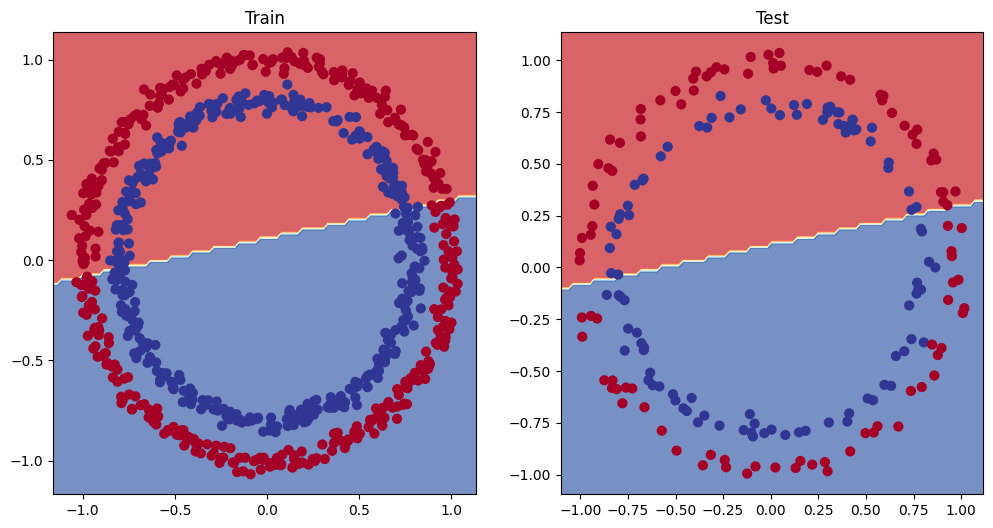

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

## 5. Improving a model

* Add more layers - give the model more chances to learn about the data
* Add mode hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* Changing the activation function
* Change the learning rate
* Change the loss function

These options are all from the model's perspective because they deal directly with the model, rather than the data

And because these options are all values we (as machine learning engineers and data scientists) can change, they are referred as **hyperparameters**.

Lets improve our model by
* Adding more hidden units 5 -> 10
* Increse the number of layers: 2 -> 3
* Increase the number of Epochs: 100 -> 1000


In [ ]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    #z = self.layer_1(x)
    #z = self.layer_2(z)
    #z = self.layer_3(z)
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create an Optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(),
                            lr = 0.1)

In [ ]:
# Building the training and testing loop
torch.manual_seed(42)

epochs = 1000

# Put the data into target device
X_train,y_train = X_train.to(device),y_train.to(device)
y_train,y_test = y_train.to(device),y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  # 1. Forward Pass
  y_logits = model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  # 2. Calculate loss/acc
  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Backpropohation
  loss.backward()

  # Gradient Descent
  optimizer.step()

  ### Testing loop

  model_1.eval()
  with torch.inference_mode():
    # 1. Forward Pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate test loss
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)

  if epoch %100 == 0:
    print(f"Epoch: {epoch} // Training loss: {loss:.5f}, Training Accuracy: {acc:.2f} // Test loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}")

Epoch: 0 // Training loss: 0.69396, Training Accuracy: 50.88 // Test loss: 0.69261, Test Accuracy: 51.00
Epoch: 100 // Training loss: 0.69305, Training Accuracy: 50.38 // Test loss: 0.69379, Test Accuracy: 48.00
Epoch: 200 // Training loss: 0.69299, Training Accuracy: 51.12 // Test loss: 0.69437, Test Accuracy: 46.00
Epoch: 300 // Training loss: 0.69298, Training Accuracy: 51.62 // Test loss: 0.69458, Test Accuracy: 45.00
Epoch: 400 // Training loss: 0.69298, Training Accuracy: 51.12 // Test loss: 0.69465, Test Accuracy: 46.00
Epoch: 500 // Training loss: 0.69298, Training Accuracy: 51.00 // Test loss: 0.69467, Test Accuracy: 46.00
Epoch: 600 // Training loss: 0.69298, Training Accuracy: 51.00 // Test loss: 0.69468, Test Accuracy: 46.00
Epoch: 700 // Training loss: 0.69298, Training Accuracy: 51.00 // Test loss: 0.69468, Test Accuracy: 46.00
Epoch: 800 // Training loss: 0.69298, Training Accuracy: 51.00 // Test loss: 0.69468, Test Accuracy: 46.00
Epoch: 900 // Training loss: 0.69298, T

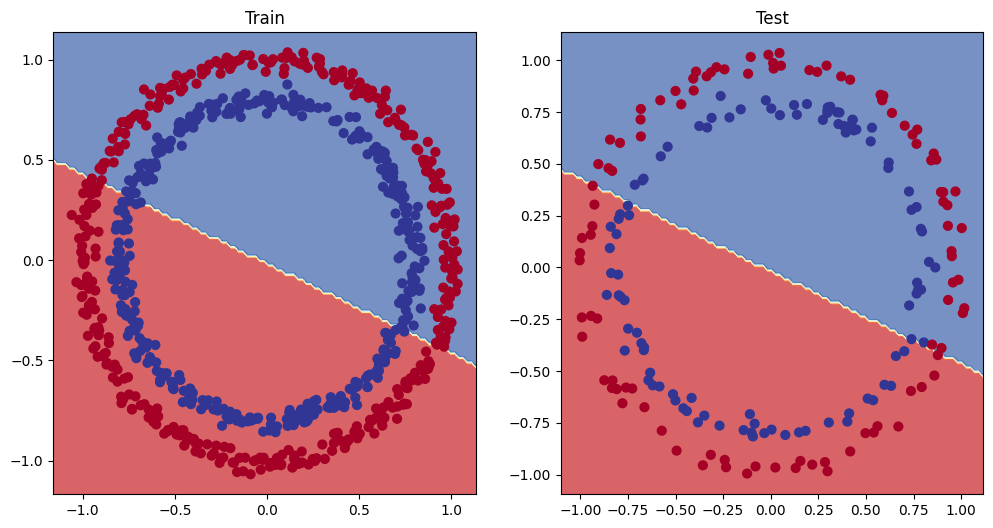

In [ ]:
# Plot the decision Boundry
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

## 5.1 Prepare data to see if our model can fit a straight line

One way to troubleshoot the larger problem is to test out a smaller problem

In [ ]:
weight = 0.7
bias = 0.3

start = 0
end = 1
steps = 0.01
X_regression = torch.arange(start,end,steps).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

print(X_regression[:10],y_regression[:10],len(X_regression),len(y_regression))


tensor([[0.0000],
        [0.0100],
        [0.0200],
        [0.0300],
        [0.0400],
        [0.0500],
        [0.0600],
        [0.0700],
        [0.0800],
        [0.0900]]) tensor([[0.3000],
        [0.3070],
        [0.3140],
        [0.3210],
        [0.3280],
        [0.3350],
        [0.3420],
        [0.3490],
        [0.3560],
        [0.3630]]) 100 100


In [ ]:
train_split = int(0.8 * len(X_regression))
X_train_regression,y_train_regression = X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regression = X_regression[train_split:],y_regression[train_split:]

len(X_train_regression),len(y_train_regression),len(X_test_regression),len(y_test_regression)

(80, 80, 20, 20)

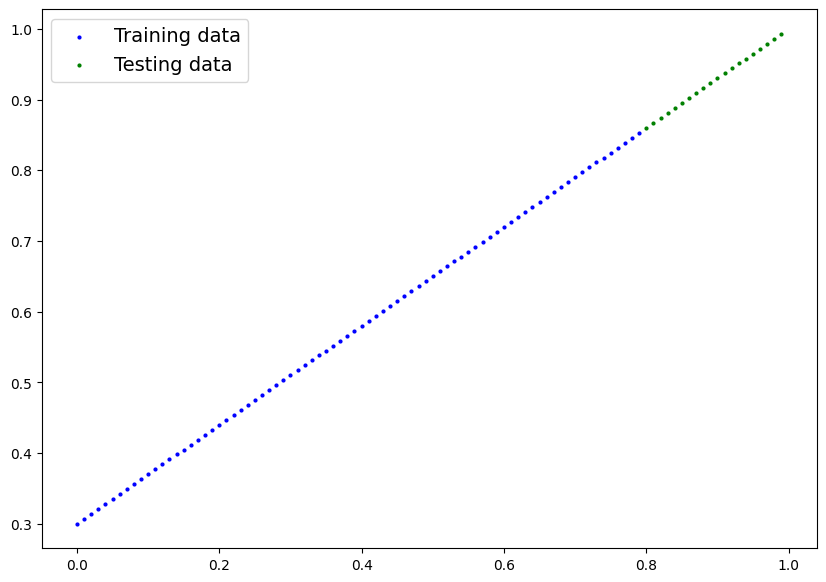

In [ ]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

### 5.2 Adjusting `model_1` to fit a straight line

In [ ]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1),
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Create a loss function
loss_fn = nn.L1Loss()

# Create an Optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr = 0.01)

In [ ]:
device

'cuda'

In [ ]:
# Building the training and testing loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

# Put the data into target device
X_train_regression,y_train_regression = X_train_regression.to(device),y_train_regression.to(device)
X_test_regression,y_test_regression = X_test_regression.to(device),y_test_regression.to(device)

for epoch in range(epochs):
  model_1.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred,y_train_regression)

  # 3. Optimizer Zero Grad
  optimizer.zero_grad()

  # 4. Backpropohation
  loss.backward()

  # Gradient Descent
  optimizer.step()

  ### Testing loop

  model_1.eval()
  with torch.inference_mode():
    test_pred = model_2(X_test_regression)
    test_loss = loss_fn(test_pred,y_test_regression)

  if epoch %100 == 0:
    print(f"Epoch: {epoch} // Training loss: {loss:.5f}// Test loss: {test_loss:.5f}")

Epoch: 0 // Training loss: 0.01229// Test loss: 0.03866
Epoch: 100 // Training loss: 0.01221// Test loss: 0.03909
Epoch: 200 // Training loss: 0.01205// Test loss: 0.03846
Epoch: 300 // Training loss: 0.01210// Test loss: 0.03728
Epoch: 400 // Training loss: 0.01162// Test loss: 0.03624
Epoch: 500 // Training loss: 0.01134// Test loss: 0.03586
Epoch: 600 // Training loss: 0.01128// Test loss: 0.03599
Epoch: 700 // Training loss: 0.01117// Test loss: 0.03510
Epoch: 800 // Training loss: 0.01114// Test loss: 0.03495
Epoch: 900 // Training loss: 0.01043// Test loss: 0.03356


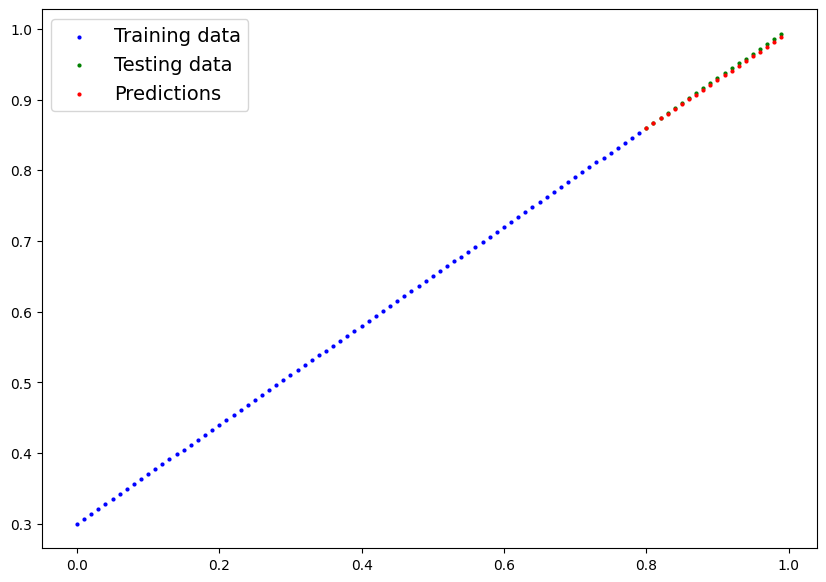

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test_regression)

plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non- linearity

What patterns coult you draw if you were given an infinite amount of the straight and non-straight line?

or in Machine learning terms an infinite (but really it is finite) if linear and non-linear functions?

### 6.1 Recreating non-linear data (red and blue circles)

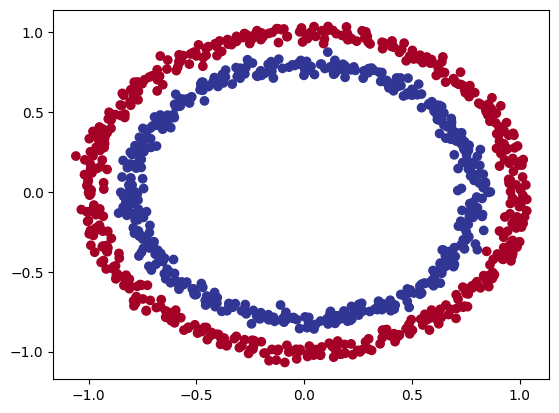

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [ ]:
# Convert data to tensors and then to train and test splits

import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

#split
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=42)

X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

Artificial Neural networks are the combination of Linear and Non-Linear functions which are potentially able to find patterns in data.


In [ ]:
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    self.relu = nn.ReLU()

  def forward(self,x):
    # where should we put out non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

### 6.3 Creating loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

### 6.4 Creating the training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  model_3.train()

  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_3.eval()

  with torch.inference_mode():
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} // Training loss: {loss:.5f}, Training accuracy: {acc:.2f} // Testing loss: {test_loss:.5f}, Testing accuracy: {test_acc:.2f}")


Epoch: 0 // Training loss: 0.69295, Training accuracy: 50.00 // Testing loss: 0.69319, Testing accuracy: 50.00
Epoch: 1000 // Training loss: 0.56818, Training accuracy: 87.75 // Testing loss: 0.57378, Testing accuracy: 86.50
Epoch: 2000 // Training loss: 0.04176, Training accuracy: 99.88 // Testing loss: 0.06583, Testing accuracy: 100.00
Epoch: 3000 // Training loss: 0.01672, Training accuracy: 99.88 // Testing loss: 0.03363, Testing accuracy: 100.00
Epoch: 4000 // Training loss: 0.01048, Training accuracy: 100.00 // Testing loss: 0.02451, Testing accuracy: 99.50
Epoch: 5000 // Training loss: 0.00765, Training accuracy: 100.00 // Testing loss: 0.01993, Testing accuracy: 99.50
Epoch: 6000 // Training loss: 0.00603, Training accuracy: 100.00 // Testing loss: 0.01726, Testing accuracy: 99.50
Epoch: 7000 // Training loss: 0.00499, Training accuracy: 100.00 // Testing loss: 0.01557, Testing accuracy: 99.50
Epoch: 8000 // Training loss: 0.00428, Training accuracy: 100.00 // Testing loss: 0.0

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10],y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

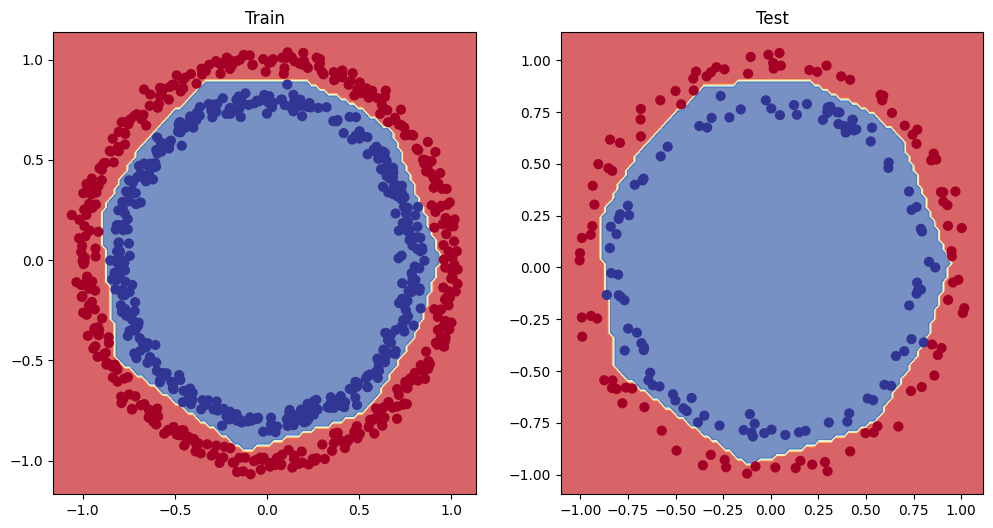

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

## 7. Replicating non-linear activation function

Neural Netowrk, rather than us telling the model what to learn, we give it the tools to discover pattern in data and pattern on its own

In [ ]:
A = torch.arange(-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

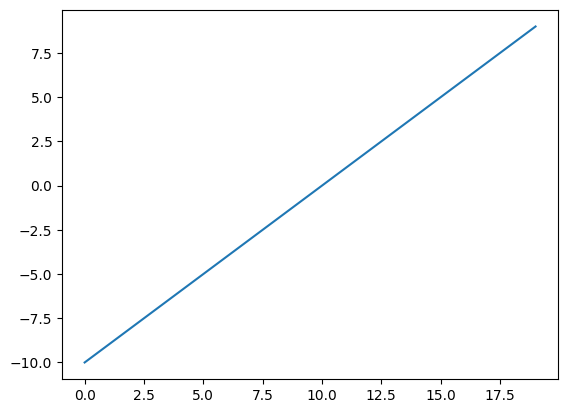

In [ ]:
plt.plot(A)

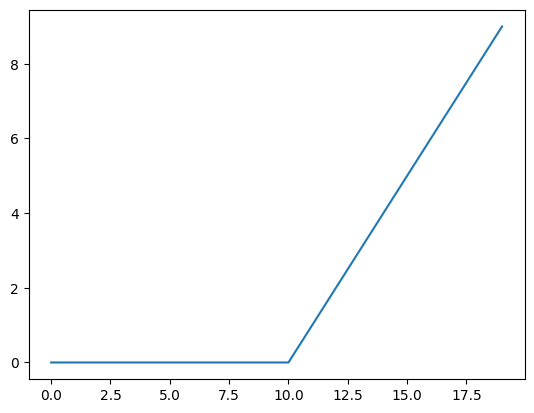

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x):
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

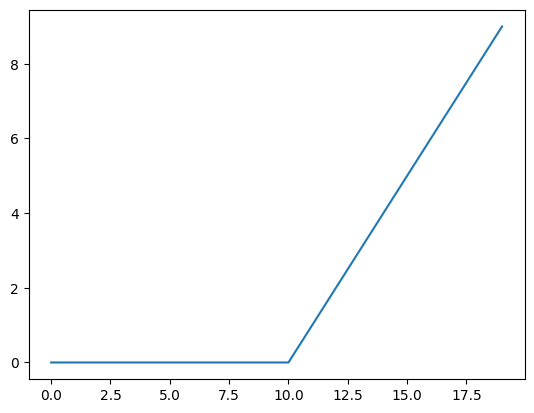

In [ ]:
#Plot ReLU activation function
plt.plot(relu(A))

In [ ]:
# Now lets do the same for Sigmoid
def sigmoid(x):
  return 1 / (1+torch.exp(-x))

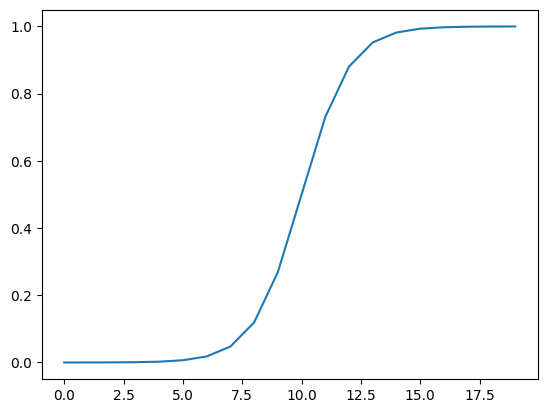

In [ ]:
plt.plot(torch.sigmoid(A))

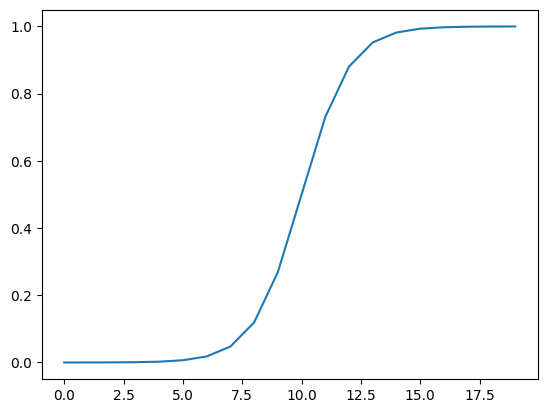

In [ ]:
plt.plot(sigmoid(A))

## 8. Putting it all together: with multi-class classification problem


### 8.1 Creating a toy multiclass dataset

In [ ]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html
from sklearn.model_selection import train_test_split

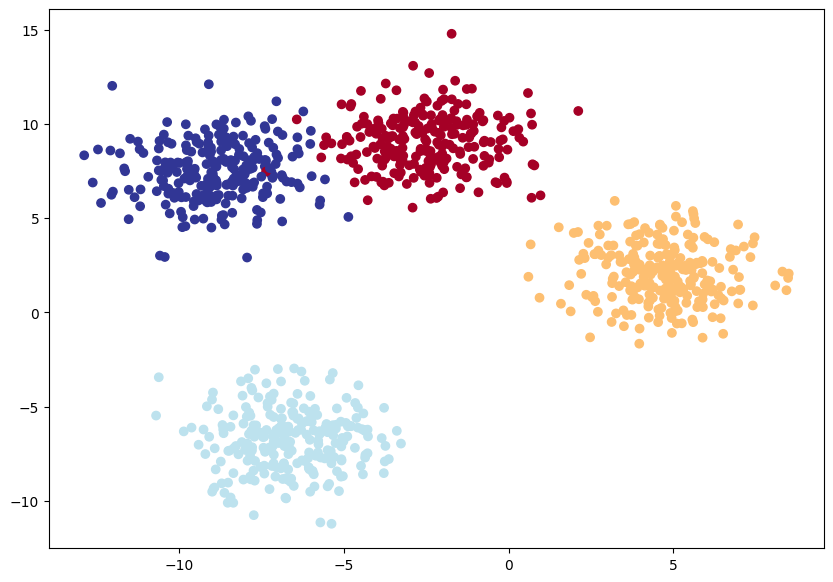

In [ ]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#1. Creating multiclass parameter
X_blob,y_blob = make_blobs(n_samples=1000,
                           n_features=NUM_FEATURES,
                           centers=NUM_CLASSES,
                           cluster_std=1.5, #give the cluster a little shape up
                           random_state=RANDOM_SEED)

# 2. Turn data into tensor
X_blob=  torch.from_numpy(X_blob).type(torch.float)
y_blob=  torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split the data into train test
X_blob_train,X_blob_test,y_blob_train,y_blob_test = train_test_split(X_blob,y_blob,
                                                 test_size=0.2,
                                                 random_state=RANDOM_SEED)

# 4. Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

### 8.2 Building a multiclass classification model in PyTorch

In [ ]:
#Create device agnostic codes

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Creating a multiclass classification model
class BlobModel(nn.Module):
  def __init__(self,input_features,output_features,hidden_units=8):
    """
    Initialize multiclass classification model.

    Args:
    input_features (int): Number of input features to the model
    output_features (int) : Number of output features to the model
    hidden_units (int): Number of hidden units between layers, default 8

    Returns:

    Example:
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features,out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        #nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)


model_4 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape, y_blob_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

### 8.3 Create a loss function and optimizer for multi-class classification

In [ ]:

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

### 8.4 Getting prediction probability for a multi-class classification PyTorch model

In order to evaluate and train and test our model, we need to convert the model's outputs (logits) to prediction probabilities and then to prediction labels.

Logits (raw output of the model) -> Pred probs (use `torch.softmax`) -> Pred labels (take the argmax of the prediction probability)

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test.to(device))

y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]], device='cuda:0')

In [ ]:
# Convert out model's logits output to prediction probabilities
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]], device='cuda:0')
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]], device='cuda:0')


In [ ]:
torch.argmax(y_pred_probs,dim=1)

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

### 8.5 Creating a training and testinf loop for the multi-class classification model

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train,y_blob_train = X_blob_train.to(device),y_blob_train.to(device)
X_blob_test,y_blob_test = X_blob_test.to(device),y_blob_test.to(device)

for epoch in range(epochs):
  model_4.train()

  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits,dim=1).argmax(dim=1)

  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Train loop
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.argmax(torch.softmax(test_logits,dim=1),dim=1)

    test_loss = loss_fn(test_logits,y_blob_test)
    test_acc = accuracy_fn(y_true=y_blob_test,
                           y_pred=test_pred)
  if epoch%10 == 0:
    print(f"Epoch: {epoch} // Loss: {loss:.4f}, Acc: {acc:.2f}% // Test loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 // Loss: 1.0432, Acc: 65.50% // Test loss: 0.5786, Test Acc: 95.50%
Epoch: 10 // Loss: 0.1440, Acc: 99.12% // Test loss: 0.1304, Test Acc: 99.00%
Epoch: 20 // Loss: 0.0806, Acc: 99.12% // Test loss: 0.0722, Test Acc: 99.50%
Epoch: 30 // Loss: 0.0592, Acc: 99.12% // Test loss: 0.0513, Test Acc: 99.50%
Epoch: 40 // Loss: 0.0489, Acc: 99.00% // Test loss: 0.0410, Test Acc: 99.50%
Epoch: 50 // Loss: 0.0429, Acc: 99.00% // Test loss: 0.0349, Test Acc: 99.50%
Epoch: 60 // Loss: 0.0391, Acc: 99.00% // Test loss: 0.0308, Test Acc: 99.50%
Epoch: 70 // Loss: 0.0364, Acc: 99.00% // Test loss: 0.0280, Test Acc: 99.50%
Epoch: 80 // Loss: 0.0345, Acc: 99.00% // Test loss: 0.0259, Test Acc: 99.50%
Epoch: 90 // Loss: 0.0330, Acc: 99.12% // Test loss: 0.0242, Test Acc: 99.50%


### 8.6 Making and evaluating predictions with PyTorch multi-class model

In [ ]:
# Make Predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

y_logits[:10]

tensor([[  4.3377,  10.3539, -14.8948,  -9.7642],
        [  5.0142, -12.0371,   3.3860,  10.6699],
        [ -5.5885, -13.3448,  20.9894,  12.7711],
        [  1.8400,   7.5599,  -8.6016,  -6.9942],
        [  8.0726,   3.2906, -14.5998,  -3.6186],
        [  5.5844, -14.9521,   5.0168,  13.2890],
        [ -5.9739, -10.1913,  18.8655,   9.9179],
        [  7.0755,  -0.7601,  -9.5531,   0.1736],
        [ -5.5918, -18.5990,  25.5309,  17.5799],
        [  7.3142,   0.7197, -11.2017,  -1.2011]], device='cuda:0')

In [ ]:
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[2.4332e-03, 9.9757e-01, 1.0804e-11, 1.8271e-09],
        [3.4828e-03, 1.3698e-10, 6.8363e-04, 9.9583e-01],
        [2.8657e-12, 1.2267e-15, 9.9973e-01, 2.6959e-04],
        [3.2692e-03, 9.9673e-01, 9.5436e-08, 4.7620e-07],
        [9.9168e-01, 8.3089e-03, 1.4120e-10, 8.2969e-06],
        [4.5039e-04, 5.4288e-13, 2.5532e-04, 9.9929e-01],
        [1.6306e-11, 2.4030e-13, 9.9987e-01, 1.3003e-04],
        [9.9860e-01, 3.9485e-04, 5.9937e-08, 1.0045e-03],
        [3.0436e-14, 6.8305e-20, 9.9965e-01, 3.5218e-04],
        [9.9843e-01, 1.3657e-03, 9.0768e-09, 2.0006e-04]], device='cuda:0')

In [ ]:
y_preds = y_pred_probs.argmax(dim=1)
y_preds

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

In [ ]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1], device='cuda:0')

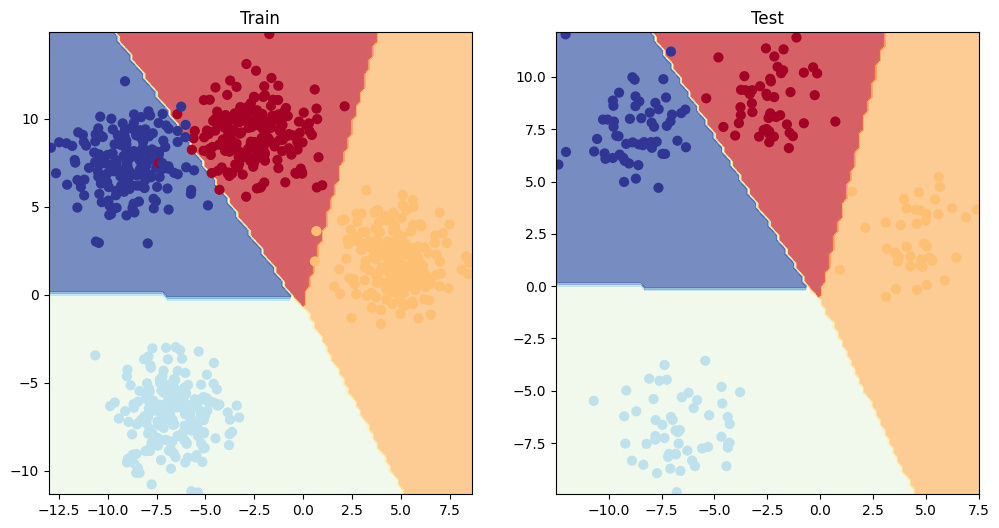

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)

### 9. A few more classification metrices

* Accuracy: Out of 100 samples, how many does outr model get right?
* Precision
* Recall
* F1-Score
* Confusion Metrix
* Classification report

See this article for precision and recall: https://towardsdatascience.com/beyond-accuracy-precision-and-recall-3da06bea9f6c

PyTorch Metrices, See TorchMetrics: https://torchmetrics.readthedocs.io/en/v0.8.2/references/metric.html
https://lightning.ai/docs/torchmetrics/stable/


In [ ]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 17.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [ ]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)
torchmetric_accuracy(y_preds,y_blob_test)

tensor(0.9950, device='cuda:0')

## Exercises and Extra-curriculum

https://www.learnpytorch.io/02_pytorch_classification/



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
import numpy as np

x = np.array([-2.2, -1.4, -.8, .2, .4, .8, 1.2, 2.2, 2.9, 4.6])
y = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0])

logr = LogisticRegression(solver='lbfgs')
logr.fit(x.reshape(-1, 1), y)

y_pred = logr.predict_proba(x.reshape(-1, 1))[:, 1].ravel()
loss = log_loss(y, y_pred)

print('x = {}'.format(x))
print('y = {}'.format(y))
print('p(y) = {}'.format(np.round(y_pred, 2)))
print('Log Loss / Cross Entropy = {:.4f}'.format(loss))

x = [-2.2 -1.4 -0.8  0.2  0.4  0.8  1.2  2.2  2.9  4.6]
y = [0. 0. 1. 0. 1. 1. 1. 1. 1. 1.]
p(y) = [0.19 0.33 0.47 0.7  0.74 0.81 0.86 0.94 0.97 0.99]
Log Loss / Cross Entropy = 0.3329


## 10. Exercise

### 10.1. Creating dataset

In [ ]:
from sklearn.datasets import make_moons
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
X,y = make_moons(n_samples=1000,shuffle=True,noise=0.03,random_state=42)

X[:10],y[:10]

(array([[-0.00933187,  0.39098105],
        [ 0.95457387, -0.47375583],
        [ 0.9185256 , -0.42519648],
        [ 0.41276802, -0.37638459],
        [-0.84532016,  0.52879908],
        [ 0.57954249, -0.35297867],
        [ 0.29488426, -0.20923768],
        [-0.01448804,  0.4358961 ],
        [ 1.62651037, -0.28120742],
        [ 0.67159767,  0.78642227]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

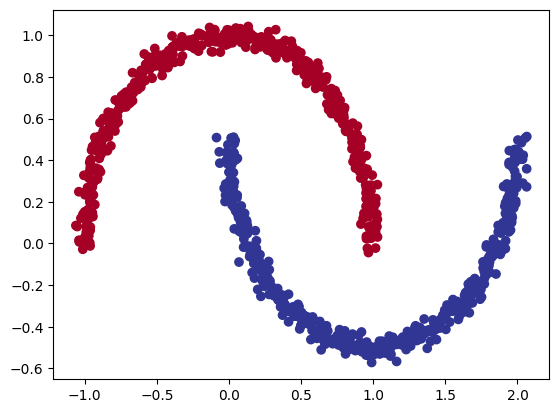

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y,cmap='RdYlBu')

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

len(X_train),len(y_train),len(X_test),len(y_test)

(800, 800, 200, 200)

### 10.2 Device Agnostic Code

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

X_train,y_train = torch.from_numpy(X_train).type(torch.float32),torch.from_numpy(y_train).type(torch.float32)
X_test,y_test = torch.from_numpy(X_test).type(torch.float32),torch.from_numpy(y_test).type(torch.float32)

X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)

print(f"X_train is in device: {X_train.device}")
print(f"y_train is in device: {y_train.device}")
print(f"X_test is in device: {X_test.device}")
print(f"y_test is in device: {y_test.device}")

X_train is in device: cuda:0
y_train is in device: cuda:0
X_test is in device: cuda:0
y_test is in device: cuda:0


### 10.3 Building model

In [ ]:
class MakeMoonV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)
    #self.relu = nn.ReLU()
    self.tanh = nn.Tanh()

  def forward(self,x):
    #return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    return self.layer_3(self.tanh(self.layer_2(self.tanh(self.layer_1(x)))))

model_5 = MakeMoonV0().to(device)

### 10.4 Creating loss function and optimizer

In [ ]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

### 10.5 Make Predictions

In [ ]:
model_5.eval()
with torch.inference_mode():
  y_logits = model_5(X_test)
y_logits[:10]

tensor([[ 0.0003],
        [ 0.2003],
        [ 0.0139],
        [ 0.2249],
        [ 0.0930],
        [ 0.1176],
        [ 0.1304],
        [ 0.0980],
        [-0.0041],
        [ 0.1953]], device='cuda:0')

In [ ]:
y_pred = torch.round(torch.sigmoid(y_logits))
y_pred[:10].squeeze(),y_test[:10]

(tensor([1., 1., 1., 1., 1., 1., 1., 1., 0., 1.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

### 10.6 Building the training and testing loop

In [ ]:
from torchmetrics.classification import BinaryAccuracy

torch.manual_seed = 42
torch.cuda.manual_seed = 42

epochs = 1000

epoch_values = []
loss_values = []
acc_values = []
test_loss_values = []
test_acc_values = []

for epoch in range(epochs):
  model_5.train()

  y_logits = model_5(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits,y_train)
  accuracy_fn = BinaryAccuracy(threshold=0.5).to(device)
  acc = accuracy_fn(y_pred,y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  ## Testing
  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(test_pred,y_test)

  epoch_values.append(epoch)
  loss_values.append(loss.cpu())
  acc_values.append(acc.cpu())
  test_loss_values.append(test_loss.cpu())
  test_acc_values.append(test_acc.cpu())

  if epoch%100==0:
    print(f"Epoch: {epoch} // Loss: {loss:.5f}, Acc: {acc:.2f} // Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}")


Epoch: 0 // Loss: 0.72431, Acc: 0.42 // Test Loss: 0.71871, Test Accuracy: 0.50
Epoch: 100 // Loss: 0.32717, Acc: 0.85 // Test Loss: 0.34325, Test Accuracy: 0.83
Epoch: 200 // Loss: 0.25557, Acc: 0.88 // Test Loss: 0.25474, Test Accuracy: 0.89
Epoch: 300 // Loss: 0.24717, Acc: 0.89 // Test Loss: 0.24300, Test Accuracy: 0.90
Epoch: 400 // Loss: 0.24149, Acc: 0.89 // Test Loss: 0.23615, Test Accuracy: 0.90
Epoch: 500 // Loss: 0.22982, Acc: 0.90 // Test Loss: 0.22337, Test Accuracy: 0.91
Epoch: 600 // Loss: 0.20048, Acc: 0.91 // Test Loss: 0.19307, Test Accuracy: 0.93
Epoch: 700 // Loss: 0.14443, Acc: 0.94 // Test Loss: 0.13739, Test Accuracy: 0.94
Epoch: 800 // Loss: 0.08822, Acc: 0.97 // Test Loss: 0.08256, Test Accuracy: 0.98
Epoch: 900 // Loss: 0.05448, Acc: 0.99 // Test Loss: 0.05002, Test Accuracy: 0.99


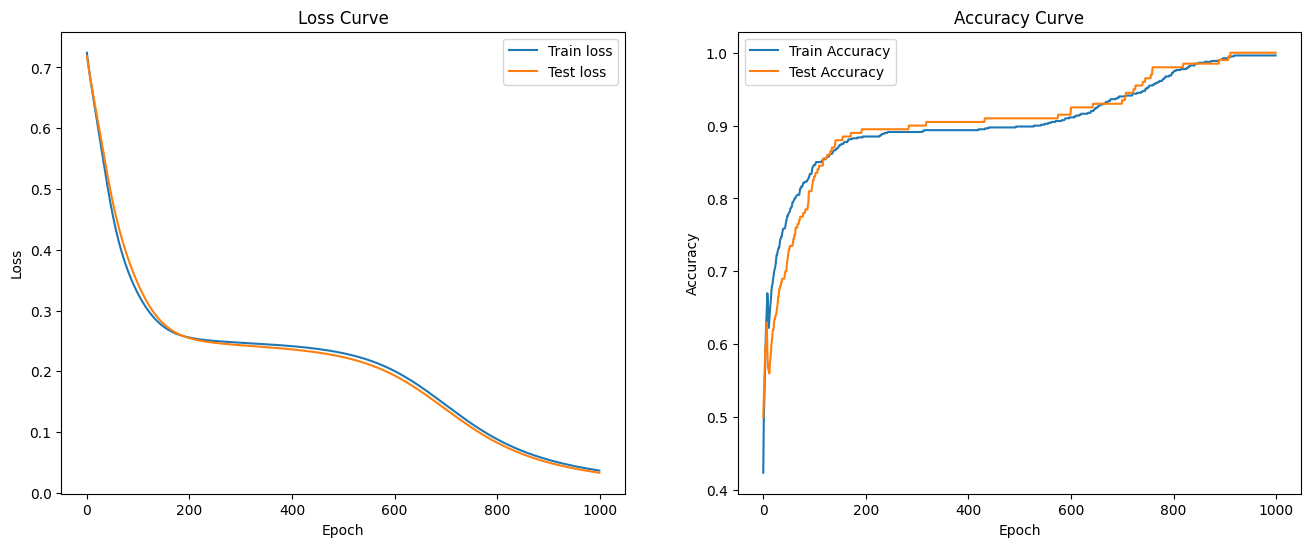

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.title("Loss Curve")
plt.plot(epoch_values,torch.tensor(loss_values).numpy(),label="Train loss")
plt.plot(epoch_values,torch.tensor(test_loss_values).numpy(),label="Test loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.subplot(1,2,2)
plt.title("Accuracy Curve")
plt.plot(epoch_values,acc_values,label="Train Accuracy")
plt.plot(epoch_values,test_acc_values,label="Test Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

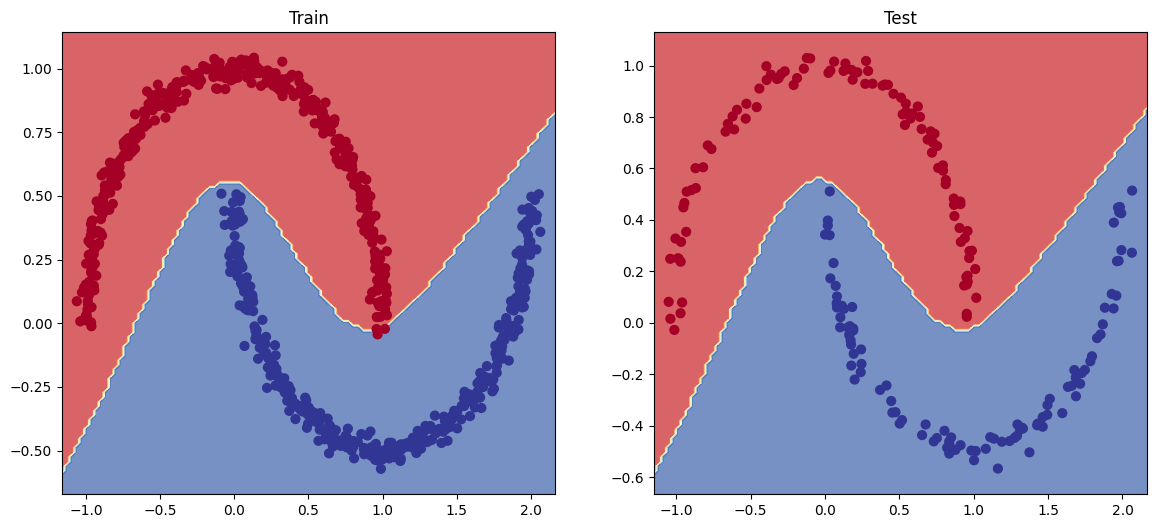

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_test,y_test)

## Exercise 2

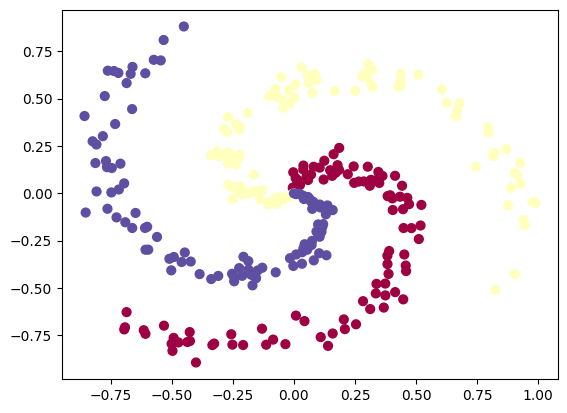

In [ ]:
# Code for creating a spiral dataset from CS231n
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()